In [13]:
import pandas as pd

word_list = pd.read_csv("outputs/creative_wordlist_v2.tsv",sep="\t",index_col=0)
word_list.duplicated().any()

False

In [14]:
import itertools
words = list(itertools.chain.from_iterable(word_list['output'].str.split(',').tolist()))
words = [w.strip() for w in words]
words

['Samantha',
 'Paris',
 'Lawrence',
 'Dancing',
 'Miko',
 'Library',
 'Nolan',
 'Studying',
 'Corinne',
 'Beach',
 'Elijah',
 'Surfing',
 'Ava',
 'Farm',
 'Finn',
 'Gardening',
 'Theodore',
 'Gym',
 'Emily',
 'Boxing',
 'Ingrid',
 'Office',
 'Trevor',
 'Typing',
 'Archie',
 'Mountain',
 'Sophie',
 'Hiking',
 'Eunice',
 'Kitchen',
 'Ian',
 'Cooking',
 'Mateo',
 'Theater',
 'Hazel',
 'Acting',
 'Garrett',
 'Garage',
 'Luna',
 'Repairing',
 'Oliver',
 'Library',
 'Emily',
 'Jogging',
 'Samantha',
 'Diner',
 'George',
 'Painting',
 'Lucas',
 'Beach',
 'Sarah',
 'Swimming',
 'Jenna',
 'Ski-Resort',
 'Derek',
 'Dancing',
 'Liam',
 'Gym',
 'Amelia',
 'Singing',
 'Tyler',
 'Nightclub',
 'Victoria',
 'Cooking',
 'Molly',
 'Coffee-Shop',
 'Zack',
 'Studying',
 'Brian',
 'Office',
 'Jessica',
 'Arguing',
 'Nina',
 'Park',
 'Martin',
 'Reading',
 'Laura',
 'Forest',
 'Alex',
 'Exploring',
 'Liam',
 'Paris',
 'Emily',
 'Running',
 'Sophia',
 'Beach',
 'Ethan',
 'Swimming',
 'Oliver',
 'Library',
 '

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(" ".join(words))
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
# import nltk

# def count_pos(words):
#     nltk.download('averaged_perceptron_tagger')
#     tagged_words = nltk.pos_tag(words)
#     noun_count = 0
#     verb_count = 0
#     for word, pos in tagged_words:
#         if pos.startswith('NN'):
#             noun_count += 1
#         elif pos.startswith('VB'):
#             verb_count += 1
#     return {'noun_count': noun_count, 'verb_count': verb_count}

import spacy
import numpy

def count_verbs_nouns(words):
    nlp = spacy.load("en_core_web_trf")
    doc = nlp(" ".join(words))
    
    verb_count = 0
    noun_count = 0
    
    for token in doc:
        if token.pos_ == "VERB":
            verb_count += 1
        elif token.pos_ == "PROPN":
            noun_count += 1
    
    return verb_count, noun_count, doc

verb_count, noun_count, doc = count_verbs_nouns(words)
print(verb_count, noun_count)

31 171


# Examine LLM Generated Items

In [ ]:
import pandas as pd

df = pd.read_json("/home/aml7990/Code/creativity-item-generation/outputs/without_eval_scores/with_controversial_filter_few_shot/llama_13b_item_gen_llama_13b_eval_max_gen_tokens_350_4_exemplars_seed_777/items.json", orient="records")
df.columns

Index(['creative_scenario_round_0', 'item_gen_model_name',
       'item_gen_max_tokens', 'item_gen_presence_penalty',
       'item_gen_frequency_penalty', 'item_gen_temperature', 'item_type',
       'item_gen_top_p', 'word_list', 'ratings_round_0',
       'creative_scenario_round_1', 'ratings_round_1',
       'creative_scenario_round_2', 'ratings_round_2',
       'creative_scenario_round_3', 'ratings_round_3',
       'creative_scenario_round_4'],
      dtype='object')

In [ ]:
import pprint
items = pd.read_json("/home/aml7990/Code/creativity-item-generation/outputs/without_eval_scores/with_controversial_filter_few_shot/llama_13b_item_gen_llama_13b_eval_max_gen_tokens_350_4_exemplars_{selection_criterion}_seed_999/item_responses_round_4.json", orient="records")
meanItemScores = items.groupby("creative_scenario_round_4").mean(numeric_only=True).sort_values(
            by=f"originality_round_4", ascending=False, inplace=False
        )

pprint.pprint(meanItemScores['originality_round_4'].iloc[0:4])

creative_scenario_round_4
Rachel is a fitness enthusiast who regularly goes to the gym to lift weights and do cardio. She has been going to the gym for several months now, and she has noticed that the gym is becoming more and more crowded. There are more people there every day, and it's becoming harder for Rachel to find the equipment she needs to use. She has also noticed that some of the new members are not very considerate of the other gym-goers. They are leaving their sweat towels on the equipment and not wiping down the machines after they use them. Rachel is worried that the gym is becoming too crowded and that it will affect her workout routine. She is also worried that the new members are not being considerate of the other gym-goers. She does not know what to do. She wants to continue going to the gym, but she does not want to deal with the crowds and the lack of consideration from the new members. She looks at the gym and sees the crowds of people and the sweat towels left on 

## LLM Evaluator Bias Check

In [1]:
import pandas as pd
import json
from sentence_transformers import SentenceTransformer
from nltk.tokenize import word_tokenize

seed = "999"
gen_model_name = "llama_70b"
eval_model_name = "llama_70b"
selection_criterion = ""
constriant = "cs"
data = "_demographic"
num_exemplars = "4"
items = pd.read_json(f"/home/aml7990/Code/creativity-item-generation/outputs/without_eval_scores/with_controversial_filter_few_shot/{gen_model_name}_item_gen_{eval_model_name}_eval_max_gen_tokens_350_{num_exemplars}_exemplars_{selection_criterion}{constriant}{data}_seed_{seed}/items.json", 
                              orient="records")
item_responses_round_0 = pd.read_json(f"/home/aml7990/Code/creativity-item-generation/outputs/without_eval_scores/with_controversial_filter_few_shot/{gen_model_name}_item_gen_{eval_model_name}_eval_max_gen_tokens_350_{num_exemplars}_exemplars_{selection_criterion}{constriant}{data}_seed_{seed}/item_responses_round_0.json", 
                              orient="records")
item_responses_round_1 = pd.read_json(f"/home/aml7990/Code/creativity-item-generation/outputs/without_eval_scores/with_controversial_filter_few_shot/{gen_model_name}_item_gen_{eval_model_name}_eval_max_gen_tokens_350_4_exemplars_{selection_criterion}{constriant}{data}_seed_{seed}/item_responses_round_1.json", 
                              orient="records")
item_responses_round_2 = pd.read_json(f"/home/aml7990/Code/creativity-item-generation/outputs/without_eval_scores/with_controversial_filter_few_shot/{gen_model_name}_item_gen_{eval_model_name}_eval_max_gen_tokens_350_4_exemplars_{selection_criterion}{constriant}{data}_seed_{seed}/item_responses_round_2.json", 
                              orient="records")
item_responses_round_3 = pd.read_json(f"/home/aml7990/Code/creativity-item-generation/outputs/without_eval_scores/with_controversial_filter_few_shot/{gen_model_name}_item_gen_{eval_model_name}_eval_max_gen_tokens_350_4_exemplars_{selection_criterion}{constriant}{data}_seed_{seed}/item_responses_round_3.json", 
                              orient="records")
item_responses_round_4 = pd.read_json(f"/home/aml7990/Code/creativity-item-generation/outputs/without_eval_scores/with_controversial_filter_few_shot/{gen_model_name}_item_gen_{eval_model_name}_eval_max_gen_tokens_350_4_exemplars_{selection_criterion}{constriant}{data}_seed_{seed}/item_responses_round_4.json", 
                              orient="records")
# item_responses_round_5 = pd.read_json(f"/home/aml7990/Code/creativity-item-generation/outputs/without_eval_scores/with_controversial_filter_few_shot/llama_13b_item_gen_llama_13b_eval_max_gen_tokens_350_4_exemplars_var_seed_{seed}/item_responses_round_5.json", 
#                               orient="records")
# item_responses_round_6 = pd.read_json(f"/home/aml7990/Code/creativity-item-generation/outputs/without_eval_scores/with_controversial_filter_few_shot/llama_13b_item_gen_llama_13b_eval_max_gen_tokens_350_4_exemplars_var_seed_{seed}/item_responses_round_6.json", 
#                               orient="records")
# item_responses_round_7 = pd.read_json(f"/home/aml7990/Code/creativity-item-generation/outputs/without_eval_scores/with_controversial_filter_few_shot/llama_13b_item_gen_llama_13b_eval_max_gen_tokens_350_4_exemplars_var_seed_{seed}/item_responses_round_7.json", 
#                               orient="records")
# item_responses_round_8 = pd.read_json(f"/home/aml7990/Code/creativity-item-generation/outputs/without_eval_scores/with_controversial_filter_few_shot/llama_13b_item_gen_llama_13b_eval_max_gen_tokens_350_4_exemplars_var_seed_{seed}/item_responses_round_8.json", 
#                               orient="records")
# item_responses_round_9 = pd.read_json(f"/home/aml7990/Code/creativity-item-generation/outputs/without_eval_scores/with_controversial_filter_few_shot/llama_13b_item_gen_llama_13b_eval_max_gen_tokens_350_4_exemplars_var_seed_{seed}/item_responses_round_9.json", 
#                               orient="records")

# item_responses_round_10 = pd.read_json(f"/home/aml7990/Code/creativity-item-generation/outputs/without_eval_scores/with_controversial_filter_few_shot/llama_13b_item_gen_llama_13b_eval_350_max_gen_tokens_seed_{seed}/item_responses_round_10.json", 
#                               orient="records")

# item_responses_round_11 = pd.read_json(f"/home/aml7990/Code/creativity-item-generation/outputs/without_eval_scores/with_controversial_filter_few_shot/llama_13b_item_gen_llama_13b_eval_350_max_gen_tokens_seed_{seed}/item_responses_round_11.json", 
#                               orient="records")

# item_responses_round_12 = pd.read_json(f"/home/aml7990/Code/creativity-item-generation/outputs/without_eval_scores/with_controversial_filter_few_shot/llama_13b_item_gen_llama_13b_eval_350_max_gen_tokens_seed_{seed}/item_responses_round_12.json", 
#                               orient="records")

# item_responses_round_13 = pd.read_json(f"/home/aml7990/Code/creativity-item-generation/outputs/without_eval_scores/with_controversial_filter_few_shot/llama_13b_item_gen_llama_13b_eval_350_max_gen_tokens_seed_{seed}/item_responses_round_13.json", 
#                               orient="records")

# item_responses_round_14 = pd.read_json(f"/home/aml7990/Code/creativity-item-generation/outputs/without_eval_scores/with_controversial_filter_few_shot/llama_13b_item_gen_llama_13b_eval_350_max_gen_tokens_seed_{seed}/item_responses_round_14.json", 
#                               orient="records")

# item_responses_round_15 = pd.read_json(f"/home/aml7990/Code/creativity-item-generation/outputs/without_eval_scores/with_controversial_filter_few_shot/llama_13b_item_gen_llama_13b_eval_350_max_gen_tokens_seed_{seed}/item_responses_round_15.json", 
#                               orient="records")

# item_responses_round_16 = pd.read_json(f"/home/aml7990/Code/creativity-item-generation/outputs/without_eval_scores/with_controversial_filter_few_shot/llama_13b_item_gen_llama_13b_eval_350_max_gen_tokens_seed_{seed}/item_responses_round_16.json", 
#                               orient="records")

# item_responses_round_17 = pd.read_json(f"/home/aml7990/Code/creativity-item-generation/outputs/without_eval_scores/with_controversial_filter_few_shot/llama_13b_item_gen_llama_13b_eval_350_max_gen_tokens_seed_{seed}/item_responses_round_17.json", 
#                               orient="records")

# item_responses_round_18 = pd.read_json(f"/home/aml7990/Code/creativity-item-generation/outputs/without_eval_scores/with_controversial_filter_few_shot/llama_13b_item_gen_llama_13b_eval_350_max_gen_tokens_seed_{seed}/item_responses_round_18.json", 
#                               orient="records")

# item_responses_round_19 = pd.read_json(f"/home/aml7990/Code/creativity-item-generation/outputs/without_eval_scores/with_controversial_filter_few_shot/llama_13b_item_gen_llama_13b_eval_350_max_gen_tokens_seed_{seed}/item_responses_round_19.json", 
#                               orient="records")

# item_responses_round_20 = pd.read_json(f"/home/aml7990/Code/creativity-item-generation/outputs/without_eval_scores/with_controversial_filter_few_shot/llama_13b_item_gen_llama_13b_eval_350_max_gen_tokens_seed_{seed}/item_responses_round_20.json", 
                            #   orient="records")

all_responses = [
    item_responses_round_0,
    item_responses_round_1,
    item_responses_round_2,
    item_responses_round_3,
    item_responses_round_4,
    # item_responses_round_5,
    # item_responses_round_6,
    # item_responses_round_7,
    # item_responses_round_8,
    # item_responses_round_9,
    # item_responses_round_10,
    # item_responses_round_11,
    # item_responses_round_12,
    # item_responses_round_13,
    # item_responses_round_14,
    # item_responses_round_15,
    # item_responses_round_16,
    # item_responses_round_17,
    # item_responses_round_18,
    # item_responses_round_19,
    # item_responses_round_20,
]

colors = [
    "tab:blue",
    "tab:orange",
    "tab:green",
    "tab:red",
    "tab:purple",
    "tab:olive",
    "tab:pink",
    "tab:gray",
    "tab:cyan",
    "tab:brown",
    "black",
    "slategrey",
    "navy",
    "palegreen",
    "tab:purple",
    "wheat",
    "lime",
    "darkblue",
    "crimson",
    "peru",
    "sandybrown"
]

model = SentenceTransformer("all-MiniLM-L6-v2")

for index, responses in enumerate(all_responses):
    responses.dropna(subset=f"creative_scenario_round_{index}", inplace=True)
    responses["length"] = responses[f"creative_response_round_{index}"].apply(lambda x: len(word_tokenize(x)))
    responses["name"] = f"creative_scenario_round_{index}"
    responses["color"] = colors[index]
    # responses["embedding"] = responses[f"creative_response_round_{index}"].apply(lambda x: model.encode(x, convert_to_tensor=True))
    
    # model.encode(responses[f"creative_response_round_{index}"].to_list())[:,:]
    

/home/aml7990/miniconda3/envs/AIG/lib/python3.11/site-packages/transformers/utils/hub.py:124: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(


In [3]:
# Examine the item content over iterations
from sentence_transformers import util
from statistics import mean

for index in range(0,5): # the number of item gen iters
    embeddings = model.encode(items[f'creative_scenario_round_{index}'].to_list(), convert_to_tensor=True)
    sims = util.cos_sim(embeddings, embeddings)
    # remove the diagonal and keep only the lower triangle since the matrix is symmetric
    sims = sims.tril().fill_diagonal_(0).flatten()
    sims = sims[sims != 0].cpu().numpy()
    # sims = pd.DataFrame(sims.cpu().numpy())
    # sims["item"] = grp[0]
    print(f"{index}: {mean(sims)}")

0: 0.392776221036911
1: 0.4364281892776489
2: 0.39699840545654297
3: 0.47303029894828796
4: 0.45392265915870667


Turning our attention back to the item responses

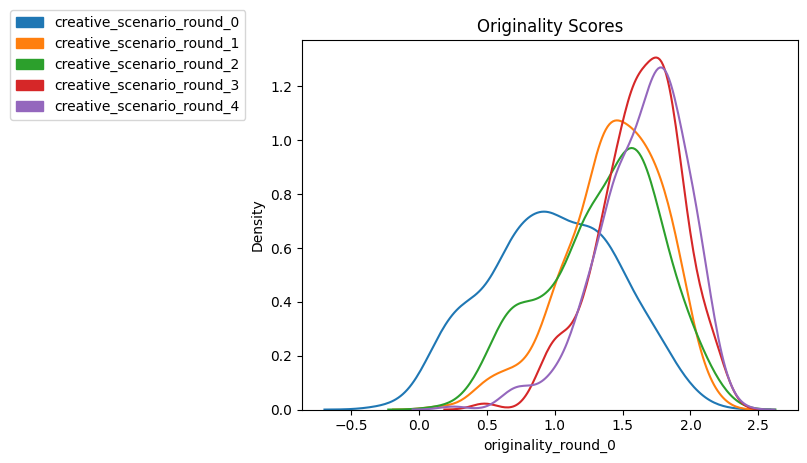

In [4]:
# plot originality and quality scores
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

handles = []
for round, responses in enumerate(all_responses):
    handles.append(mpatches.Patch(color=responses.iloc[0]["color"], label=responses.iloc[0]["name"]))
    ax = sns.kdeplot(data = responses, x=f"originality_round_{round}")

plt.title("Originality Scores")
ax.legend(handles=handles,bbox_to_anchor=(-0.2,1.2,0.1,-0.1))

In [6]:
item_responses_round_4["originality_round_4"].mean()

1.646849864723889

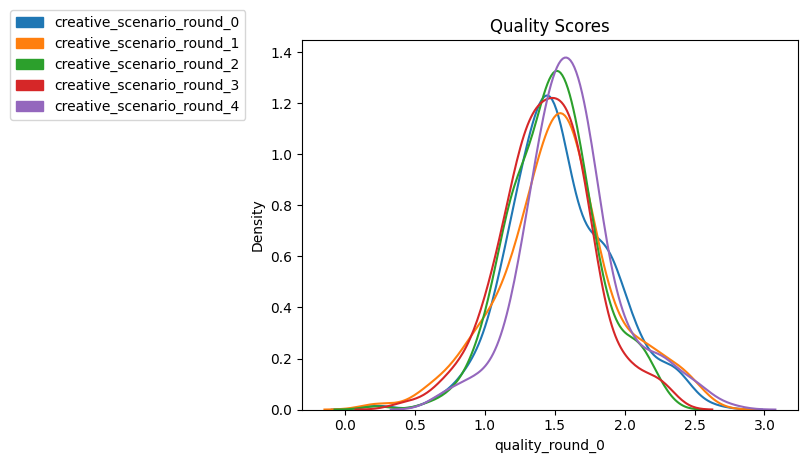

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

handles = []
for round, responses in enumerate(all_responses):
    handles.append(mpatches.Patch(color=responses.iloc[0]["color"], label=responses.iloc[0]["name"]))
    ax = sns.kdeplot(data = responses, x=f"quality_round_{round}")

plt.title("Quality Scores")
ax.legend(handles=handles,bbox_to_anchor=(-0.2,1.2,0.1,-0.1))

In [19]:
# checking if length is correlated with originality / quality in the data
from scipy.stats import spearmanr
for round, responses in enumerate(all_responses):
    col = f"originality_round_{round}"
    corr = spearmanr(responses[col], responses["length"])
    print(f"Round {round}: {corr}")

Round 0: SignificanceResult(statistic=0.232137508430525, pvalue=8.582308617533508e-06)
Round 1: SignificanceResult(statistic=0.09111387196998103, pvalue=0.14288348029056555)
Round 2: SignificanceResult(statistic=0.20694821971469574, pvalue=0.005313307153141234)
Round 3: SignificanceResult(statistic=0.18091420702343053, pvalue=0.015082237661525418)
Round 4: SignificanceResult(statistic=0.1800698348232147, pvalue=0.015568997527680319)


In [35]:
from scipy.stats import spearmanr
for round, responses in enumerate(all_responses):
    col = f"quality_round_{round}"
    corr = spearmanr(responses[col], responses["length"])
    print(f"Round {round}: {corr}")

Round 0: SignificanceResult(statistic=0.7114202669881254, pvalue=3.0533126009530464e-75)
Round 1: SignificanceResult(statistic=0.4795265373737013, pvalue=8.356695512934098e-20)
Round 2: SignificanceResult(statistic=0.6207178599890937, pvalue=2.4048899447891832e-33)
Round 3: SignificanceResult(statistic=0.7101644595739932, pvalue=3.869260957857765e-38)
Round 4: SignificanceResult(statistic=0.6849385432404896, pvalue=8.262364968927763e-32)


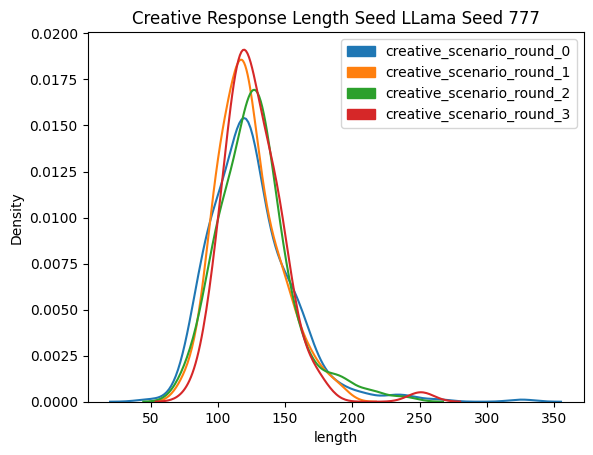

In [11]:
# examine mean response length
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

handles = []
for responses in all_responses:
    handles.append(mpatches.Patch(color=responses.iloc[0]["color"], label=responses.iloc[0]["name"]))
    ax = sns.kdeplot(data = responses, x="length")

plt.title(f"Creative Response Length Seed LLama Seed {seed}")
ax.legend(handles=handles)

In [12]:
# check for similarity between all item pairs for each creative scenario
# responses["embedding"] = responses[f"creative_response_round_{index}"].apply(lambda x: model.encode(x, convert_to_tensor=True))
from sentence_transformers import util
from statistics import mean

all_sims = pd.DataFrame(columns=["x","y"])
for index, response in enumerate(all_responses):
    grp_sims = []
    for grp in response.groupby(f"creative_scenario_round_{index}"):
        embeddings = model.encode(grp[1][f'creative_response_round_{index}'].to_list(), convert_to_tensor=True)
        sims = util.cos_sim(embeddings, embeddings)
        # remove the diagonal and keep only the lower triangle since the matrix symmetric
        sims = sims.tril().fill_diagonal_(0).flatten()
        sims = sims[sims != 0]
        grp_sims += list(sims.cpu().numpy())
        # sims = pd.DataFrame(sims.cpu().numpy())
        # sims["item"] = grp[0]
    print(f"{index}: {mean(grp_sims)}")
    all_sims= pd.concat((all_sims, pd.DataFrame({"x":index, "y": mean(grp_sims)}, index=[0])))
    

0: 0.7261372804641724


/tmp/ipykernel_2333777/4270801961.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_sims= pd.concat((all_sims, pd.DataFrame({"x":index, "y": mean(grp_sims)}, index=[0])))


1: 0.7280538082122803
2: 0.7179358005523682
3: 0.6961668133735657


Text(0.5, 1.0, 'CPS Response Similarity LLama Seed 777')

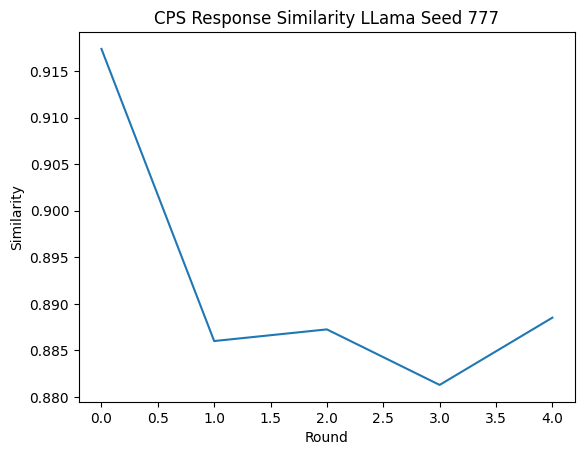

In [11]:
import seaborn as sns
sns.lineplot(data=all_sims, x="x", y="y")
plt.ylabel("Similarity")
plt.xlabel("Round")
plt.title(f"CPS Response Similarity LLama Seed {seed}")

# Graphs looking trends across genrations for paper

In [31]:
import torch
import pandas as pd
import os.path
from sentence_transformers import SentenceTransformer, util
from os.path import join
item_gen_path = "/home/aml7990/Code/creativity-item-generation/outputs/consequences"

In [ ]:
model = SentenceTransformer("all-MiniLM-L6-v2")
use_rescored = False
task = "consequences"
dirs = [
    d
    for d in os.listdir(item_gen_path)
    if os.path.isdir(os.path.join(item_gen_path, d))
]
all_items_round_0 = []
all_item_responses_round_0 = []
all_item_responses_round_4 = []
all_items_round_4 = []
for d in dirs:
    # skip over runs that are still processing:
    print(d)
    files = os.listdir(join(item_gen_path, d))
    if use_rescored:
        if "config.json" not in files or "items.json" not in files or "item_responses_round_0_rescored.json" not in files or "item_responses_round_4_rescored.json" not in files:
            continue
    else:
        if "config.json" not in files or "items.json" not in files or "item_responses_round_0.json" not in files or "item_responses_round_4.json" not in files:
            continue
    items = pd.read_json(join(item_gen_path, d, "items.json"))
    config = pd.read_json(join(item_gen_path, d, "config.json"), typ='series')
    if use_rescored:
        item_responses_round_0 = pd.read_json(join(item_gen_path, d, "item_responses_round_0_rescored.json"))
        item_responses_round_4 = pd.read_json(join(item_gen_path, d, "item_responses_round_4_rescored.json"))
    else:
        item_responses_round_0 = pd.read_json(join(item_gen_path, d, "item_responses_round_0.json"))
        item_responses_round_4 = pd.read_json(join(item_gen_path, d, "item_responses_round_4.json"))
    if len(items) == 0:
        continue

    print(d)
    if task == "CPS":
        items_round_0 = items[
            ["creative_scenario_round_0", "word_list", "item_gen_model_name"]
        ]
        items_round_4 = items[
            ["creative_scenario_round_4", "word_list", "item_gen_model_name"]
        ]
    else:
        items_round_0 = items[
            ["creative_scenario_round_0", "item_gen_model_name"]
        ]
        items_round_4 = items[
            ["creative_scenario_round_4", "item_gen_model_name"]
        ]
    items_round_0["originality_mean"] = item_responses_round_0["originality_round_0"].mean()
    items_round_4["originality_mean"] = item_responses_round_4["originality_round_4"].mean()
    items_round_0["itemResponsePrompt"] = config["itemResponseGenPromptIdx"]
    items_round_4["itemResponsePrompt"] = config["itemResponseGenPromptIdx"]
    config = pd.read_json(join(item_gen_path, d, "config.json"), orient="index").T
    combined_round_0 = items_round_0.merge(
        config, how="outer", left_on="item_gen_model_name", right_on="itemGenModelName"
    )
    combined_round_4 = items_round_4.merge(
        config, how="outer", left_on="item_gen_model_name", right_on="itemGenModelName"
    )
    if "/" in combined_round_0["itemGenModelName"].iloc[0]:
        combined_round_0["itemGenModelName"] = combined_round_0["itemGenModelName"].iloc[0].split("/")[1]
    if "/" in combined_round_4["itemGenModelName"].iloc[0]:
        combined_round_4["itemGenModelName"] = combined_round_4["itemGenModelName"].iloc[0].split("/")[1]
    all_items_round_0.append(combined_round_0)
    all_items_round_4.append(combined_round_4)
    all_item_responses_round_0.append(item_responses_round_0)
    all_item_responses_round_4.append(item_responses_round_4)

all_items_round_0 = pd.concat(all_items_round_0).reset_index(drop=True)
all_items_round_0.loc[all_items_round_0["itemGenModelName"] == "vicuna-13b-v1.5-16k"]["itemGenModelName"] = "vicuna-13b-v1.5"
all_items_round_4 = pd.concat(all_items_round_4).reset_index(drop=True)
all_items_round_4.loc[all_items_round_4["itemGenModelName"] == "vicuna-13b-v1.5-16k"]["itemGenModelName"] = "vicuna-13b-v1.5"
all_item_responses_round_0 = pd.concat(all_item_responses_round_0).reset_index(drop=True)
all_item_responses_round_4 = pd.concat(all_item_responses_round_4).reset_index(drop=True)

In [33]:
# drop near duplicate items
# drop items that are near or exact duplicates of another one
# ~13 minute run time
all_items_round_0["embedding"] = all_items_round_0["creative_scenario_round_0"].apply(lambda x: model.encode(x))
round_0_sims = util.cos_sim(all_items_round_0["embedding"],all_items_round_0["embedding"])
round_0_sims = torch.where(round_0_sims > 0.9, torch.tensor(1.0), torch.tensor(0.0))
round_0_sims = torch.tril(round_0_sims)
round_0_sims.fill_diagonal_(torch.tensor(0.0))
indices = torch.nonzero(round_0_sims)[:,0]
indices = pd.Index(indices.numpy()).drop_duplicates()
all_items_round_0.drop(indices, inplace=True)

all_items_round_4["embedding"] = all_items_round_4["creative_scenario_round_4"].apply(lambda x: model.encode(x))
round_4_sims = util.cos_sim(all_items_round_4["embedding"],all_items_round_4["embedding"])
round_4_sims = torch.tril(round_4_sims)
round_4_sims = torch.where(round_4_sims > 0.9, torch.tensor(1.0), torch.tensor(0.0))
round_4_sims.fill_diagonal_(torch.tensor(0.0))
indices = torch.nonzero(round_4_sims)[:,0]
indices = pd.Index(indices.numpy()).drop_duplicates()
all_items_round_4.drop(indices, inplace=True)

# print("Round 0")
# while True:
#     drop = False
#     print(len(all_items_round_0))
#     for index, row in all_items_round_0.iterrows():
#         others = all_items_round_0.loc[all_items_round_0.index != index]
#         sims = util.cos_sim(row["embedding"],others["embedding"].to_list())[0]
#         if len(sims[sims >= 0.99]):
#             drop = True
#             break
    
#     if not drop or len(all_items_round_0) == 0:
#         break
#     else:
#         all_items_round_4 = all_items_round_4.loc[all_items_round_4.index != index].reset_index(drop=True)



# print("Round 5")
# while True:
#     drop = False
#     print(len(all_items_round_4))
#     for index, row in all_items_round_4.iterrows():
#         others = all_items_round_4.loc[all_items_round_4.index != index]
#         sims = util.cos_sim(row["embedding"],others["embedding"].to_list())[0]
#         if len(sims[sims >= 0.99]):
#             drop = True
#             mask = torch.where(sims >= 0.99, 1, 0).numpy()
#             break
    
#     if not drop or len(all_items_round_4) == 0:
#         break
#     else:
#         all_items_round_4 = all_items_round_4.loc[all_items_round_4.index != index].reset_index(drop=True)

In [34]:
len(all_items_round_0)

495

In [35]:
len(all_items_round_4)

769

In [37]:
all_items_round_0.to_csv("consequences_round_0_deduped.csv")
all_items_round_4.to_csv("consequences_round_4_depuped.csv")

In [3]:
all_items_round_4["shotSelectionAlgorithm"].fillna(value="greedy", inplace=True)
all_items_round_0["shotSelectionAlgorithm"].fillna(value="greedy", inplace=True)

In [4]:
all_items_round_4["shotSelectionAlgorithm"].value_counts()

shotSelectionAlgorithm
greedy                     264
constraint satisfaction    165
random                      50
Name: count, dtype: int64

In [5]:
all_items_round_0 = all_items_round_0.merge(all_item_responses_round_0,on="creative_scenario_round_0")
all_items_round_4 = all_items_round_4.merge(all_item_responses_round_4,on="creative_scenario_round_4")

In [6]:
# all_items_round_0.loc[all_items_round_0["itemGenModelName"] == "vicuna-13b-v1.5-16k"]["itemGenModelName"] = "vicuna-13b-v1.5"
# all_items_round_4.loc[all_items_round_4["itemGenModelName"] == "vicuna-13b-v1.5-16k"]["itemGenModelName"] = "vicuna-13b-v1.5"
for index,row in all_items_round_0.iterrows():
    if row["itemGenModelName"] == "vicuna-13b-v1.5-16k":
        all_items_round_0.at[index, "itemGenModelName"] = "vicuna-13b-v1.5"

for index,row in all_items_round_4.iterrows():
    if row["itemGenModelName"] == "vicuna-13b-v1.5-16k":
        all_items_round_4.at[index, "itemGenModelName"] = "vicuna-13b-v1.5"

In [7]:
all_items_round_0["itemGenModelName"].value_counts()

itemGenModelName
vicuna-13b-v1.5        22950
Llama-2-13b-chat-hf     3020
Llama-2-7b-chat-hf      1200
Llama-2-70b-chat-hf     1060
claude-3                 920
vicuna-7b-v1.5           120
Name: count, dtype: int64

In [8]:
import numpy as np
# item_responses_round_0_demographic = all_item_responses_round_0.loc[all_item_responses_round_0["title"] != "NaN"]
# item_responses_round_0_demographic
item_responses_round_0_demographic = all_item_responses_round_0.dropna(subset="title")
item_responses_round_0_psychometric = all_item_responses_round_0.dropna(subset="FirstName")
item_responses_round_4_demographic = all_item_responses_round_4.dropna(subset="title")
item_responses_round_4_psychometric = all_item_responses_round_4.dropna(subset="FirstName")

In [41]:
# load human originality scores from RWP data
human_scores = pd.read_csv("/home/aml7990/Code/creativity-item-generation/optimize_item_gen_prompt/data/CPSTfulldataset2.csv")
human_scores = human_scores[human_scores["set"] == "training"]
human_summary_stats = human_scores.describe()

/tmp/ipykernel_431668/4143229583.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(human_scores["FacScoresO"], label="Human")
/tmp/ipykernel_431668/4143229583.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(all_items_round_4.loc[all_items_round_4["itemResponsePrompt"] == 1]["originality_ro

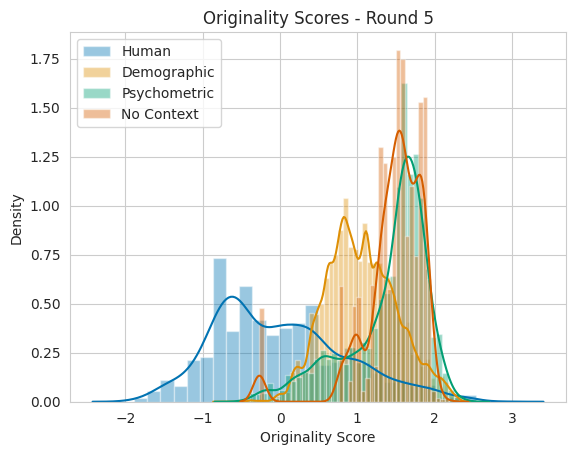

In [29]:
# visualizing originality curves
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("colorblind")
sns.set_style("whitegrid")
sns.distplot(human_scores["FacScoresO"], label="Human")
sns.distplot(all_items_round_4.loc[all_items_round_4["itemResponsePrompt"] == 1]["originality_round_4"], label="Demographic")
sns.distplot(all_items_round_4.loc[all_items_round_4["itemResponsePrompt"] == 2]["originality_round_4"], label="Psychometric")
sns.distplot(all_items_round_4.loc[all_items_round_4["itemResponsePrompt"] == 0]["originality_round_4"], label="No Context")
plt.title("Originality Scores - Round 5")
plt.xlabel("Originality Score")
plt.legend()
plt.savefig("all_orig_scores_round_4.svg", dpi=300)

In [42]:
# ~ 30 minutes
# plot originality as a function of similarity, for each major prompting style
from sentence_transformers import util
from statistics import mean
# random_0 = all_items_round_0.loc[all_items_round_0["shotSelectionAlgorithm"] == "random"].reset_index(drop=True)
# greedy_0 = all_items_round_0.loc[all_items_round_0["shotSelectionAlgorithm"] == "greedy"].reset_index(drop=True)
# cs_0 = all_items_round_0.loc[all_items_round_0["shotSelectionAlgorithm"] == "constraint satisfaction"].reset_index(drop=True)

random_4 = all_items_round_4.loc[all_items_round_4["shotSelectionAlgorithm"] == "random"].reset_index(drop=True)
greedy_4 = all_items_round_4.loc[all_items_round_4["shotSelectionAlgorithm"] == "greedy"].reset_index(drop=True)
cs_4 = all_items_round_4.loc[all_items_round_4["shotSelectionAlgorithm"] == "constraint satisfaction"].reset_index(drop=True)

print("Random")
# random_0["response_embedding"] = random_0["creative_response_round_0"].apply(lambda x: model.encode(x))
# random_0["response_sim"] = 0.0
# for index,row in random_0.iterrows():
#     sim_score = util.cos_sim(row["response_embedding"], random_0["response_embedding"])
#     sim_score = sim_score.flatten()
#     sim_score = mean(sim_score[sim_score != 0].cpu().numpy())
#     random_0.at[index, "response_sim"] = sim_score

# sims_random_0 = util.cos_sim(random_0["response_embedding"], random_0["response_embedding"])
# sims_random_0 = sims_random_0.tril().fill_diagonal_(0).flatten()
# sims_random_0 = sims_random_0[sims_random_0 != 0].cpu().numpy()
# print(sims_random_0)
    
random_4["response_embedding"] = random_4["creative_response_round_4"].apply(lambda x: model.encode(x))
random_4["response_sim"] = 0.0
for index,row in random_4.iterrows():
    sim_score = util.cos_sim(row["response_embedding"], random_4["response_embedding"])
    sim_score = sim_score.flatten()
    sim_score = mean(sim_score[sim_score != 0].cpu().numpy())
    random_4.at[index, "response_sim"] = sim_score

    
# greedy_0["response_embedding"] = greedy_0["creative_response_round_0"].apply(lambda x: model.encode(x))
# greedy_0["response_sim"] = 0.0
# for index,row in greedy_0.iterrows():
#     sim_score = util.cos_sim(row["response_embedding"], greedy_0["response_embedding"])
#     sim_score = sim_score.flatten()
#     sim_score = mean(sim_score[sim_score != 0].cpu().numpy())
#     greedy_0.at[index, "response_sim"] = sim_score


print("greedy")    
greedy_4["response_embedding"] = greedy_4["creative_response_round_4"].apply(lambda x: model.encode(x))
greedy_4["response_sim"] = 0.0
for index,row in greedy_4.iterrows():
    sim_score = util.cos_sim(row["response_embedding"], greedy_4["response_embedding"])
    sim_score = sim_score.flatten()
    sim_score = mean(sim_score[sim_score != 0].cpu().numpy())
    greedy_4.at[index, "response_sim"] = sim_score



print("CS")
# cs_0["response_embedding"] = cs_0["creative_response_round_0"].apply(lambda x: model.encode(x))
# cs_0["response_sim"] = 0.0
# for index,row in cs_0.iterrows():
#     sim_score = util.cos_sim(row["response_embedding"], cs_0["response_embedding"])
#     sim_score = sim_score.flatten()
#     sim_score = mean(sim_score[sim_score != 0].cpu().numpy())
#     cs_0.at[index, "response_sim"] = sim_score


    
cs_4["response_embedding"] = cs_4["creative_response_round_4"].apply(lambda x: model.encode(x))
cs_4["response_sim"] = 0.0
for index,row in cs_4.iterrows():
    sim_score = util.cos_sim(row["response_embedding"], cs_4["response_embedding"])
    sim_score = sim_score.flatten()
    sim_score = mean(sim_score[sim_score != 0].cpu().numpy())
    cs_4.at[index, "response_sim"] = sim_score

Random


TypeError: Data source must be a DataFrame or Mapping, not <class 'list'>.

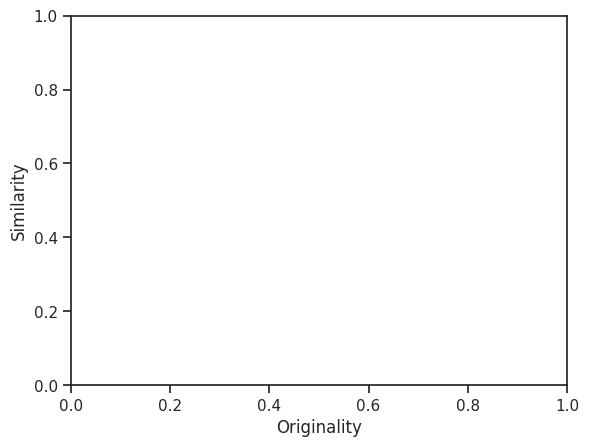

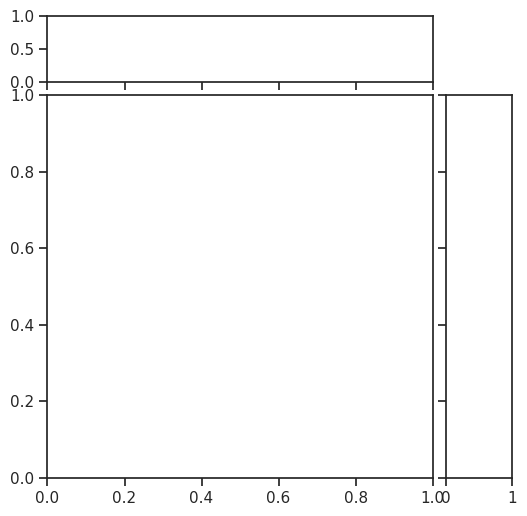

In [4]:
import seaborn as sns
import pylab as plt
import pandas as pd

# graph_data = pd.DataFrame(columns=["Round","Selection Method", "Originality", "Similarity"])
# graph_data = pd.concat((graph_data,pd.DataFrame({"Round": [5]*len(random_4), "Selection Method": ["Random"]*len(random_4), "Originality": random_4["originality_mean"], "Similarity": random_4["response_sim"]})))
# graph_data.reset_index(drop=True)
# graph_data = pd.concat((graph_data,pd.DataFrame({"Round": [5]*len(cs_4), "Selection Method": ["Constraint Satisfaction"]*len(cs_4), "Originality": cs_4["originality_mean"], "Similarity": cs_4["response_sim"]})))
# graph_data.reset_index(drop=True)
# graph_data = pd.concat((graph_data,pd.DataFrame({"Round": [5]*len(greedy_4), "Selection Method": ["Greedy"]*len(greedy_4), "Originality": greedy_4["originality_mean"], "Similarity": greedy_4["response_sim"]})))
# graph_data.reset_index(drop=True)

# sns.jointplot(graph_data, x="Originality", y="Similarity", hue="Selection Method", kind="kde")
# 

# sns.set_theme(style="ticks")
# sns.set_palette("colorblind")
# plt.rcParams.update({'legend.fontsize': 8})
# g = sns.JointGrid(graph_data, x="Originality", y="Similarity", hue="Selection Method", marginal_ticks=True)
# g.plot_joint(
#     sns.histplot, discrete=(False, False),
#     cmap="light:#03012d", pmax=.8, cbar=False
# )
# g.plot_marginals(
#     sns.histplot, element="step", color="#03012d"
# )
# g.savefig("summary_results.svg",dpi=300)

graph_data = []
sns.set_theme(style="ticks")
sns.set_palette("colorblind")
plt.xlabel("Originality")
plt.ylabel("Similarity")
plt.rcParams.update({'legend.fontsize': 8})
g = sns.JointGrid(graph_data, x="Originality", y="Similarity", hue="Selection Method", marginal_ticks=True)
g.plot_joint(
    sns.histplot, discrete=(False, False),
    cmap="light:#03012d", pmax=.8, cbar=False
)
g.plot_marginals(
    sns.histplot, element="step", color="#03012d"
)

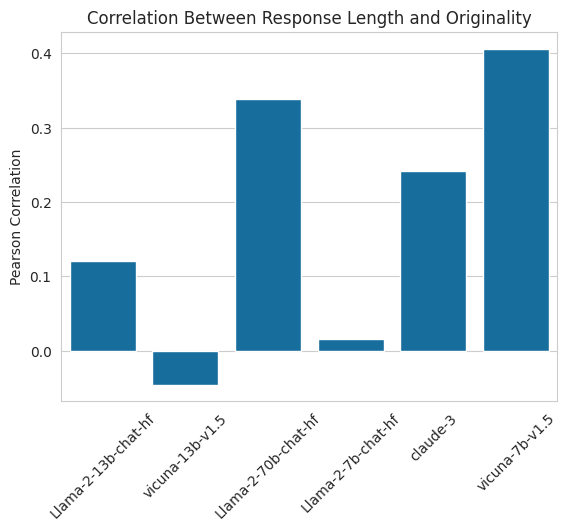

In [10]:
# correlation between originality score and mean length, broken down by model
from scipy.stats import pearsonr
from nltk.tokenize import word_tokenize
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
sns.set_palette("colorblind")
subset_4 = all_items_round_4.loc[all_items_round_4["shotSelectionAlgorithm"] != "random"]
corrs = {}
llm_names = all_items_round_4["itemGenModelName"].unique()
for llm in llm_names:
    scores = subset_4[subset_4["itemGenModelName"] == llm]["originality_mean"]
    responses = subset_4[subset_4["itemGenModelName"] == llm]["creative_response_round_4"].to_list()
    responses = [len(word_tokenize(r)) for r in responses]
    corrs[llm] = pearsonr(scores,responses)[0]

sns.barplot(corrs)
plt.xticks(rotation=45)
plt.title("Correlation Between Response Length and Originality")
plt.ylabel("Pearson Correlation")
plt.savefig("corr_analysis.svg", dpi=300)

In [47]:
print(len(item_responses_round_0_demographic))
print(len(item_responses_round_4_demographic))
print(len(item_responses_round_0_psychometric))
print(len(item_responses_round_4_psychometric))

7361
5251
5120
1900


In [46]:
# check that mean originiality scores are significantly different
from scipy.stats import ttest_rel
t_sample = item_responses_round_0_demographic["originality_round_0"].sample(n=5251,replace=False)
print(ttest_rel(t_sample, item_responses_round_4_demographic["originality_round_4"]))

TtestResult(statistic=-59.817284293795524, pvalue=0.0, df=5250)


In [48]:
t_sample = item_responses_round_0_psychometric["originality_round_0"].sample(n=1900,replace=False)
print(ttest_rel(t_sample, item_responses_round_4_psychometric["originality_round_4"]))

TtestResult(statistic=-21.412519893217066, pvalue=2.7195606177804747e-91, df=1899)


/tmp/ipykernel_431668/1741935766.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_0["Round"] = "Round 1"
/tmp/ipykernel_431668/1741935766.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_4["Round"] = "Round 5"


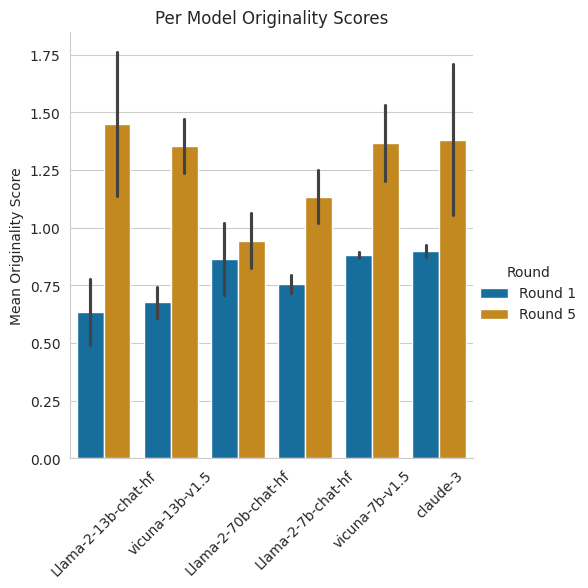

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("colorblind")
subset_0 = all_items_round_0.loc[all_items_round_0["shotSelectionAlgorithm"] != "random"]
subset_0["Round"] = "Round 1"
subset_4 = all_items_round_4.loc[all_items_round_4["shotSelectionAlgorithm"] != "random"]
subset_4["Round"] = "Round 5"
round_0_mean = subset_0[["itemGenModelName","originality_mean","Round"]]
round_4_mean = subset_4[["itemGenModelName","originality_mean","Round"]]
combined = pd.concat((round_0_mean,round_4_mean))

sns.catplot(data=combined,x=combined["itemGenModelName"],y=combined["originality_mean"],errorbar="sd", kind="bar", hue="Round")
plt.title("Per Model Originality Scores")
plt.xticks(rotation=45)
plt.xlabel("")
plt.ylabel("Mean Originality Score")
plt.savefig("originality_scores_per_item.svg",dpi=300)

In [50]:
round_0_cs = all_items_round_0.loc[all_items_round_0["shotSelectionAlgorithm"] == "constraint satisfaction"]
round_4_cs = all_items_round_4.loc[all_items_round_4["shotSelectionAlgorithm"] == "constraint satisfaction"]

round_0_random = all_items_round_0.loc[all_items_round_0["shotSelectionAlgorithm"] == "random"]
round_4_random = all_items_round_4.loc[all_items_round_4["shotSelectionAlgorithm"] == "random"]

round_0_greedy = all_items_round_0.loc[all_items_round_0["shotSelectionAlgorithm"] == "greedy"]
round_4_greedy = all_items_round_4.loc[all_items_round_4["shotSelectionAlgorithm"] == "greedy"]

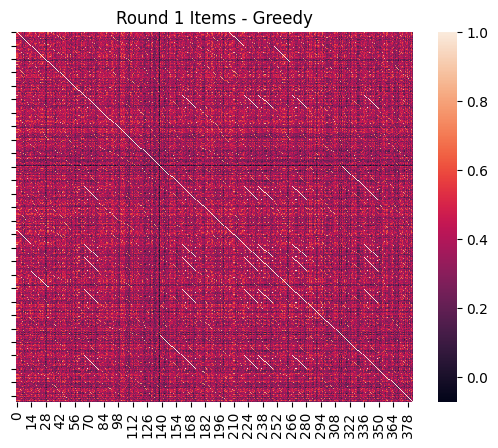

In [10]:
embed_matrix = np.array([x for x in round_0_greedy["embedding"]])
sim_mat = cosine_similarity(embed_matrix)
sns.heatmap(sim_mat)
plt.yticks([x for x in range(0, len(round_0_greedy["embedding"]),14)])
plt.title("Round 1 Items - Greedy")
plt.savefig("greddy_round_1_items.svg",dpi=300)

/tmp/ipykernel_431668/2391604430.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sim_mat_cs, label="Constraint Satisfaction")


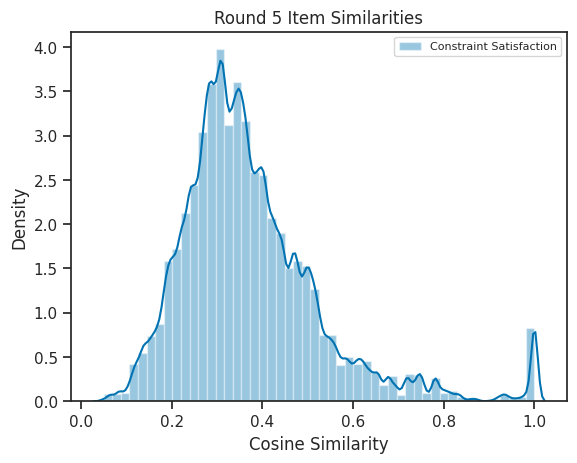

In [51]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
# embed_matrix_greedy = np.asarray(list(round_4_greedy["embedding"].apply(lambda x: list(x))))
embed_matrix_cs = np.asarray(list(round_4_cs["embedding"].apply(lambda x: list(x))))
# embed_matrix_random = np.asarray(list(round_4_random["embedding"].apply(lambda x: list(x))))

# sim_mat_greedy = cosine_similarity(embed_matrix_greedy)
# sim_mat_greedy = np.tril(sim_mat_greedy).flatten()
# sim_mat_greedy = sim_mat_greedy[sim_mat_greedy != 0]

# sim_mat_random = cosine_similarity(embed_matrix_random)
# sim_mat_random = np.tril(sim_mat_random).flatten()
# sim_mat_random = sim_mat_random[sim_mat_random != 0]

sim_mat_cs = cosine_similarity(embed_matrix_cs)
sim_mat_cs = np.tril(sim_mat_cs).flatten()
sim_mat_cs = sim_mat_cs[sim_mat_cs != 0]

# sns.distplot(sim_mat_greedy, label="Greedy")
sns.distplot(sim_mat_cs, label="Constraint Satisfaction")
# sns.distplot(sim_mat_random, label="Random")
# sns.heatmap(sim_mat, cbar_kws={"label":"Cosine Similarity"})
plt.title("Round 5 Item Similarities")
plt.xlabel("Cosine Similarity")
plt.legend()
# plt.savefig("Item_sim_dist.svg",dpi=300)
# plt.yticks([x for x in range(0, len(round_0_greedy["embedding"]),14)])
# plt.savefig("greedy_round_5_items.svg",dpi=300)

/tmp/ipykernel_3125606/596556591.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(round_4_greedy["originality_mean"], label="Greedy")
/tmp/ipykernel_3125606/596556591.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(round_4_cs["originality_mean"], label="Constraint Satisfaction")
/tmp/ipyk

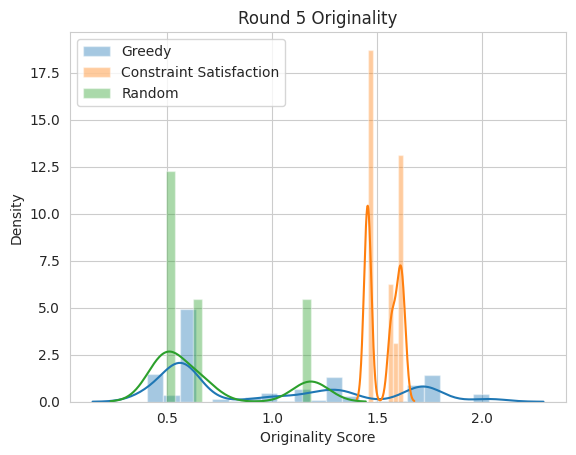

In [112]:
sns.distplot(round_4_greedy["originality_mean"], label="Greedy")
sns.distplot(round_4_cs["originality_mean"], label="Constraint Satisfaction")
sns.distplot(round_4_random["originality_mean"], label="Random")
plt.title("Round 5 Originality")
plt.xlabel("Originality Score")
plt.legend()
# plt.savefig("Item_originality_dist_round_4.svg",dpi=300)

In [132]:
all_items_round_4["itemGenModelName"].value_counts()

itemGenModelName
Llama-2-13b-chat-hf    2220
Llama-2-7b-chat-hf     1900
vicuna-13b-v1.5        1550
Llama-2-70b-chat-hf     450
vicuna-7b-v1.5           60
Name: count, dtype: int64

In [143]:
# get data for table
# item_responses_round_0_demographic = all_item_responses_round_0.dropna(subset="title")
# item_responses_round_0_psychometric = all_item_responses_round_0.dropna(subset="FirstName")
# item_responses_round_4_demographic = all_item_responses_round_4.dropna(subset="title")
# item_responses_round_4_psychometric = all_item_responses_round_4.dropna(subset="FirstName")

# all_items_round_0[(all_items_round_0["itemResponseGenPromptIdx"] == 2)]["originality_mean"].mean()
human_scores

,...1,Problem,Solutions,FacScoresQ,FacScoresO,Dataset,ProblemID,set,ID,wordcount,DSI
0,1,Becky is a college student who works part-time...,She could leave an anonymous note for the mana...,-1.411284,0.313362,RLPS1,Becky,training,201,16,0.767786
1,2,Becky is a college student who works part-time...,I think Becky should tell Jim that what he don...,-1.411284,-0.596276,RLPS1,Becky,training,269,26,0.806005
2,3,Becky is a college student who works part-time...,To begin I think that it is great that Becky h...,3.971947,1.033759,RLPS1,Becky,training,237,358,0.829131
3,4,Becky is a college student who works part-time...,Becky should talk to Jim about the choices he ...,1.165038,0.054535,RLPS1,Becky,training,47,63,0.811605
4,5,Becky is a college student who works part-time...,Becky should start by talking to Jim about thi...,0.107464,-0.484259,RLPS1,Becky,training,222,60,0.788266
...,...,...,...,...,...,...,...,...,...,...,...
3066,3067,The Engineering Department of Acme Company has...,Give the workers some benefits,-1.249138,-1.082155,RLPS10,Acme,training,3067,5,0.718914
3067,3068,The Engineering Department of Acme Company has...,They should hire individuals with more time ma...,-0.868178,0.255806,RLPS10,Acme,training,3068,9,0.733072
3068,3069,The Engineering Department of Acme Company has...,Acme should keep their best employers and get ...,-0.048004,-0.586168,RLPS10,Acme,training,3069,35,0.804239
3069,3070,The Engineering Department of Acme Company has...,The writing of handwritten and personalized le...,-0.290460,1.243920,RLPS10,Acme,training,3070,22,0.796932


In [147]:
all_items_round_0.columns

Index(['creative_scenario_round_0', 'word_list', 'item_gen_model_name',
       'embedding', 'originality_mean', 'random_seed', 'numIter',
       'itemGenModelName', 'useItemEvalModel', 'useItemResponseEvalModel',
       'itemEvalModelName', 'itemResponseGenModelName',
       'itemGenFrequencyPenalty', 'itemEvalFrequencyPenalty',
       'itemResponseGenFrequencyPenalty', 'itemGenPresencePenalty',
       'itemEvalPresencePenalty', 'itemResponseGenPresencePenalty',
       'itemGenTemperature', 'itemEvalTemperature',
       'itemResponseGenTemperature', 'itemGenTopP', 'itemEvalTopP',
       'itemResponseGenTopP', 'itemGenPromptIdx', 'itemEvalPromptIdx',
       'itemResponseGenPromptIdx', 'itemGenMaxTokens', 'itemEvalMaxTokens',
       'itemResponseGenMaxTokens', 'wordlistFile', 'demographicsFile',
       'itemGenOutputFile', 'itemEvalOutputFile', 'itemResponseGenOutputFile',
       'numItemsPerList', 'numItemGenerationAttempts',
       'itemResponseOriginalityModelDir', 'itemResponseQualit

In [169]:
from pprint import pprint
# pick an item to show qualatively
# 7455, 7459
all_items_round_4[all_items_round_4["itemGenModelName"] == "Llama-2-13b-chat-hf"].reset_index(drop=True)["creative_scenario_round_4"].iloc[2215]
# all_items_round_0[all_items_round_0["itemGenModelName"] == "Llama-2-13b-chat-hf"].reset_index(drop=True)["creative_scenario_round_0"].iloc[2815]

"Elijah is a frequent customer at the movie theater. He often spends hours watching movies and has become friends with many of the other regulars at the theater. However, Elijah has been having trouble with his hearing and has been unable to hear many of the dialogues in the movies. He has been relying on Olivia, the theater's personal assistant, to help him with his hearing and to motivate him to keep going. Recently, Elijah's hearing has been causing him a lot of pain and he has been unable to watch movies at all. He is worried that he will lose all of his progress and will not be able to get back in shape. Olivia has been trying to help him, but Elijah is feeling very frustrated and is not sure what to do. He is worried about his hearing and is worried that he will not be able to watch movies again."

Annotation rating graphs (need to be updated)

In [ ]:
evals_round_1 = list(item_responses["ratings_round_0"])
evals_round_1 = [json.loads(e.replace("'","\"")) for e in evals_round_1]
evals_round_1 = pd.json_normalize(evals_round_1)
# evals_round_1.drop(columns=["Emotional_Focus"],inplace=True)
# evals_round_1.dropna(inplace=True)
evals_round_1

,Complexity,Open-endedness,Constraints,Relationships,Accessibility,Emotional Focus,Controversial
0,3,3,2,3,3,3,2
1,3,3,3,3,3,3,3
2,3,3,2,3,3,3,2
3,3,3,3,3,3,3,2
4,3,3,3,3,3,2,3
5,3,3,3,3,3,3,3
6,3,3,3,3,3,3,2
7,2,3,2,3,3,2,2
8,3,2,3,2,2,2,0
9,3,3,3,3,3,3,3


In [ ]:
evals_round_2 = list(item_responses["ratings_round_1"])
evals_round_2 = [json.loads(e.replace("'","\"")) for e in evals_round_2]
evals_round_2 = pd.json_normalize(evals_round_2)
# evals_round_1.drop(columns=["Emotional_Focus"],inplace=True)
# evals_round_1.dropna(inplace=True)
evals_round_2

,Complexity,Open-endedness,Constraints,Relationships,Accessibility,Emotional Focus,Controversial
0,3,3,3,3,3,3,2
1,3,3,3,3,3,3,3
2,3,3,3,3,3,3,3
3,3,3,3,3,3,3,2
4,3,3,3,3,3,3,3
5,3,2,3,3,2,3,3
6,3,3,3,3,3,3,3
7,3,3,3,3,3,2,2
8,3,3,3,3,3,3,0
9,3,3,3,3,3,3,3


So to summarize the major findings:
1. Additonal rounds of feedback appear helpful in improving response quality.
2. Increasing the presence penalty lower the item quality, but only slights, with the analysis hindered by the small sample size.

/tmp/ipykernel_643550/4085289969.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(evals_round_1[column], hist=True, kde=True, label=column)
/tmp/ipykernel_643550/4085289969.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(evals_round_1[column], hist=True, kde=True, label=column)
/tmp/ipyke

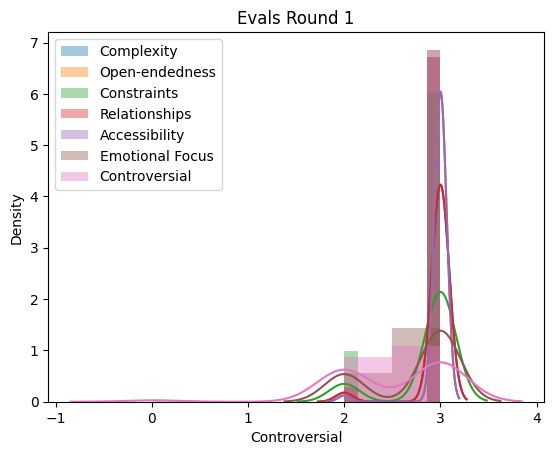

In [ ]:
for column in evals_round_1.columns:
    sns.distplot(evals_round_1[column], hist=True, kde=True, label=column)

plt.title("Evals Round 1")
plt.legend()

/tmp/ipykernel_643550/2534539261.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(evals_round_2[column], hist=True, kde=True, label=column)
/home/aml7990/miniconda3/envs/AIG/lib/python3.11/site-packages/seaborn/distributions.py:2496: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
/tmp/ipykernel_643550/2534539261.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `hist

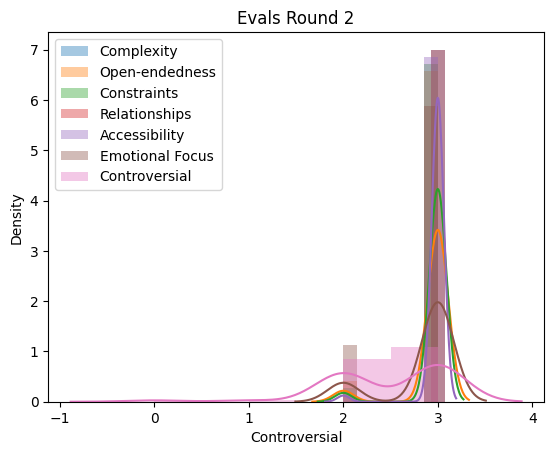

In [ ]:
for column in evals_round_2.columns:
    sns.distplot(evals_round_2[column], hist=True, kde=True, label=column)

plt.title("Evals Round 2")
plt.legend()

In [ ]:
# comparing the old prompt, the new prompt, and the new prompt with exemplars, all using LLama items
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
evals_new_prompt = pd.read_json("/home/aml7990/Code/creativity-item-generation/outputs/with_eval_scores/with_controversial_filter_0-shot/creative_scenario_5_words_with_topics_meta-llama-Llama-2-70b-chat-hf_iteration_2.json")
evals_old_prompt = pd.read_csv("/home/aml7990/Code/creativity-item-generation/outputs/with_eval_scores/eval_without_controversial_filter/creative_scenario_5_words_with_topics_meta-llama-Llama-2-70b-chat-hf_iteration_2.tsv", sep="\t")
evals_new_prompt_13b = pd.read_json("/home/aml7990/Code/creativity-item-generation/outputs/with_eval_scores/with_controversial_filter_0-shot/creative_scenario_5_words_with_topics_meta-llama-Llama-2-13b-chat-hf.json")
evals_new_prompt_few_shot = pd.read_json("/home/aml7990/Code/creativity-item-generation/outputs/with_eval_scores/creative_scenario_5_words_with_topics_meta-llama-Llama-2-70b-chat-hf.json")

/tmp/ipykernel_2534465/4143753373.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(e_old_prompt[column], hist=True, kde=True, label=column)
/tmp/ipykernel_2534465/4143753373.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(e_old_prompt[column], hist=True, kde=True, label=column)
/tmp/ipyke

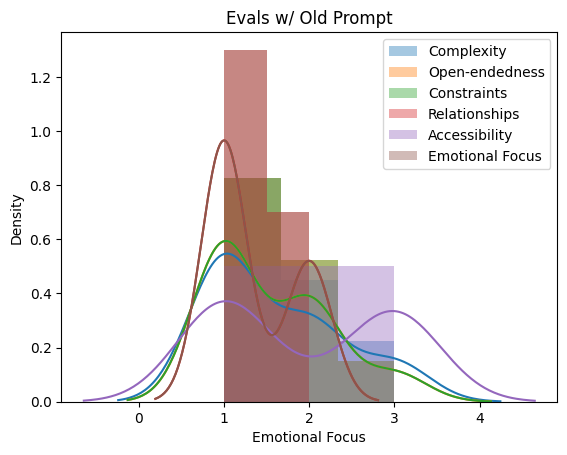

In [ ]:
e_old_prompt = list(evals_old_prompt["ratings"])
e_old_prompt = [json.loads(e) for e in e_old_prompt]
e_old_prompt = pd.json_normalize(e_old_prompt)
# len(evals_presence)

for column in e_old_prompt.columns:
    sns.distplot(e_old_prompt[column], hist=True, kde=True, label=column)

plt.title("Evals w/ Old Prompt")
plt.legend()

/tmp/ipykernel_2534465/2926489339.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(e_new_prompt[column], hist=True, kde=True, label=column)
/tmp/ipykernel_2534465/2926489339.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(e_new_prompt[column], hist=True, kde=True, label=column)
/tmp/ipyke

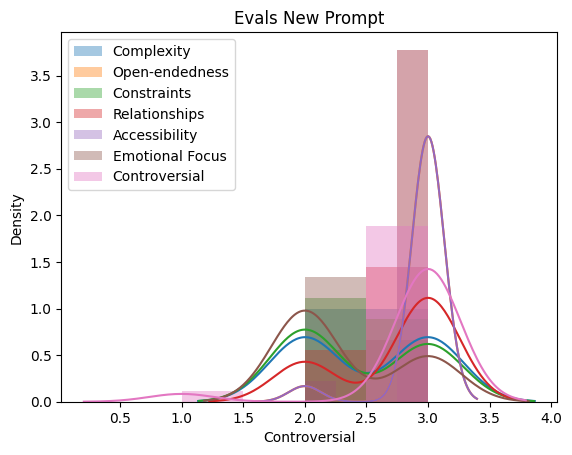

In [ ]:
e_new_prompt = list(evals_new_prompt["ratings_round_1"])
e_new_prompt = [json.loads(e) for e in e_new_prompt]
e_new_prompt = pd.json_normalize(e_new_prompt)
# len(evals_presence)

for column in e_new_prompt.columns:
    sns.distplot(e_new_prompt[column], hist=True, kde=True, label=column)

plt.title("Evals New Prompt")
plt.legend()

/tmp/ipykernel_2534465/441690068.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(e_new_prompt_13b[column], hist=True, kde=True, label=column)
/tmp/ipykernel_2534465/441690068.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(e_new_prompt_13b[column], hist=True, kde=True, label=column)
/tmp

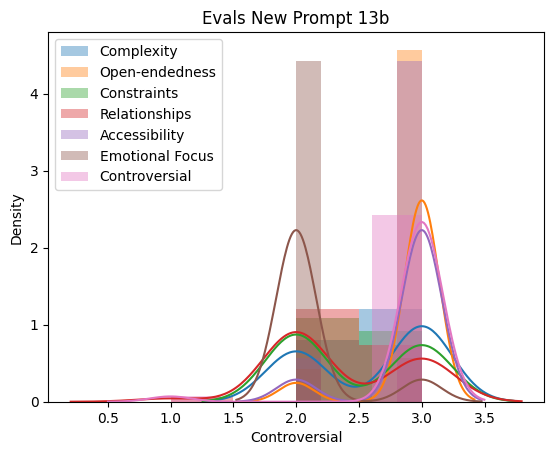

In [ ]:
# check against the much smaller model
e_new_prompt_13b = list(evals_new_prompt_13b["ratings_round_1"])
e_new_prompt_13b = [json.loads(e) for e in e_new_prompt_13b]
e_new_prompt_13b = pd.json_normalize(e_new_prompt_13b)

for column in e_new_prompt_13b.columns:
    sns.distplot(e_new_prompt_13b[column], hist=True, kde=True, label=column)

plt.title("Evals New Prompt 13b")
plt.legend()

/tmp/ipykernel_2534465/3766541876.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(e_new_w_exemplars[column], hist=True, kde=True, label=column)
/tmp/ipykernel_2534465/3766541876.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(e_new_w_exemplars[column], hist=True, kde=True, label=column)


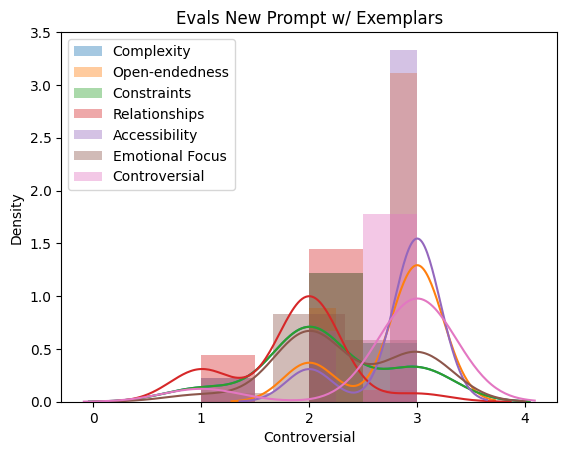

In [ ]:
# new prompt with exemplars
e_new_w_exemplars = list(evals_new_prompt_few_shot["ratings_round_1"])
e_new_w_exemplars = [json.loads(e) for e in e_new_w_exemplars]
e_new_w_exemplars = pd.json_normalize(e_new_w_exemplars)

for column in e_new_w_exemplars.columns:
    sns.distplot(e_new_w_exemplars[column], hist=True, kde=True, label=column)

plt.title("Evals New Prompt w/ Exemplars")
plt.legend()

In [ ]:
import pandas as pd
import textwrap
scenarios = pd.read_json("/home/aml7990/Code/creativity-item-generation/outputs/without_eval_scores/with_controversial_filter_few_shot/creative_scenario_5_words_with_topics_presence_0_meta-llama-Llama-2-70b-chat-hf.json", orient="records")
print('\n'.join(textwrap.wrap(scenarios.iloc[42]["creative_scenario"],width=100,replace_whitespace=False)))

Amelia is a bookstore owner who has a secret crush on one of her employees, Benjamin. She has been
trying to get his attention for months, but he seems to be oblivious to her feelings. One day, Lily,
a new employee, starts working at the bookstore and immediately catches Benjamin's eye. Amelia feels
threatened by Lily's presence and is torn between her desire to protect her business and her desire
to pursue a relationship with Benjamin.                    As Amelia is trying to decide what to do,
she overhears Lily and Benjamin talking about their shared love of a particular book. Amelia
realizes that this book is a rare and valuable edition that she has been searching for, and she
knows that if she can find it, she can use it to impress Benjamin and win him over. However, she
also knows that the book is very expensive and she is not sure if she can afford it.
What should Amelia do?                    A) Buy the book and try to impress Benjamin
B) Ignore the book and focus on building 

In [ ]:
len(scenarios)

43

## Topic Modeling to check for semantic diversity

In [ ]:
# TODO: finish?
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)